<a href="https://colab.research.google.com/github/jjoo1229/machine-learning-and-deep-learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0day6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-07-08 11:48:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-07-08 11:48:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-07-08 11:48:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
pca.components_.shape

(50, 10000)

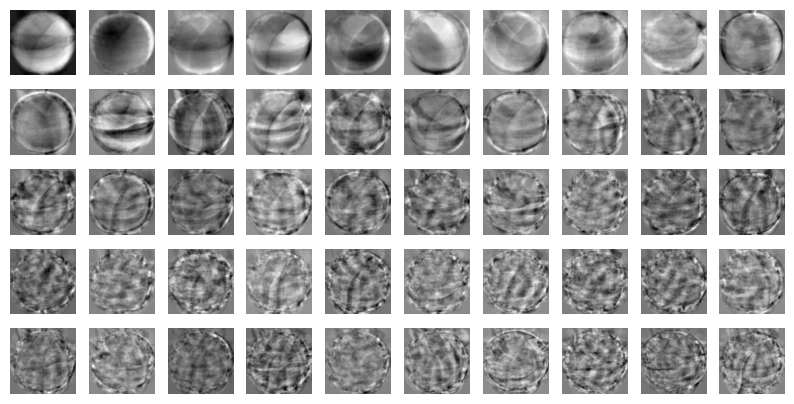

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [8]:
fruit_inverse = pca.inverse_transform(fruits_pca)
fruit_inverse.shape

(300, 10000)

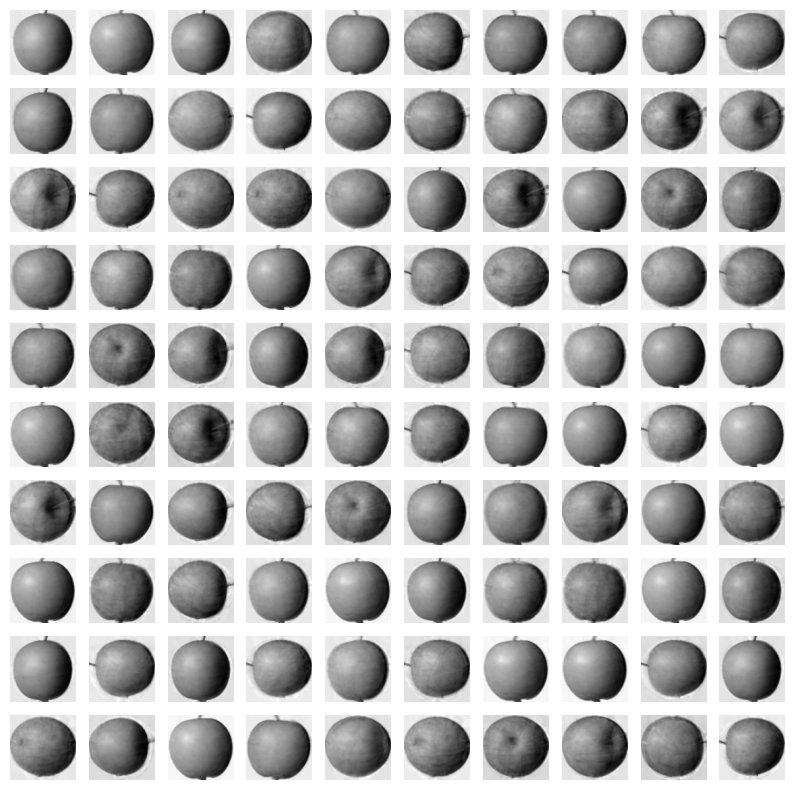

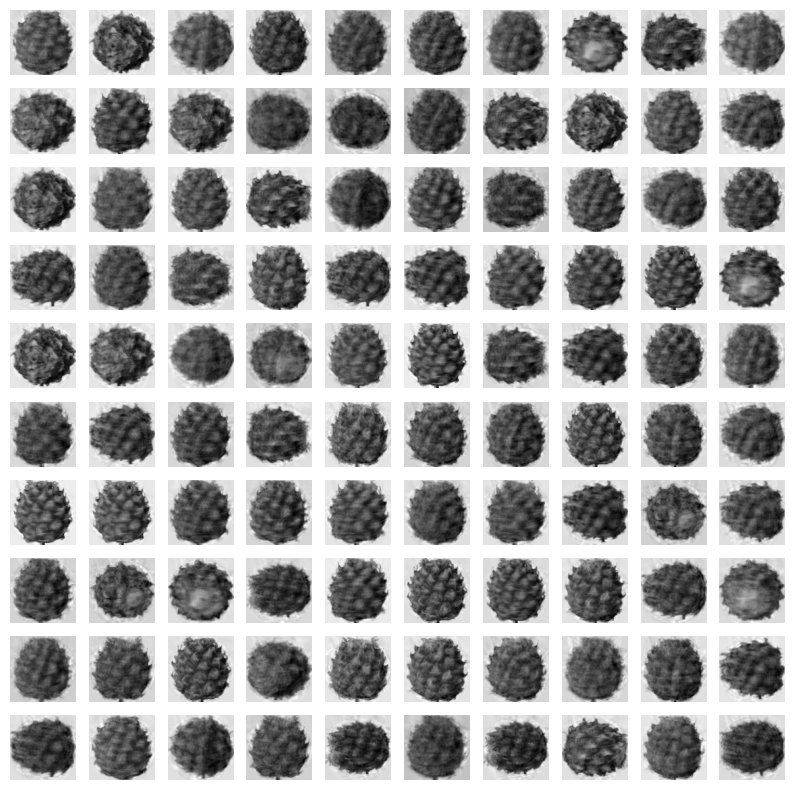

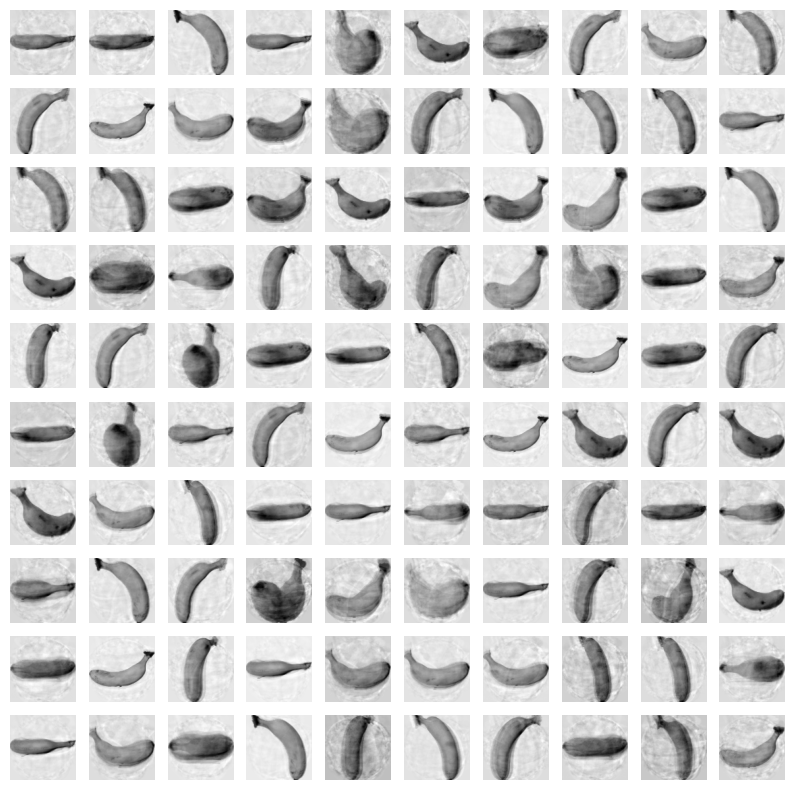

In [10]:
fruits_reconstruct = fruit_inverse.reshape(-1, 100, 100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [11]:
np.sum(pca.explained_variance_ratio_)

0.9215303625011655

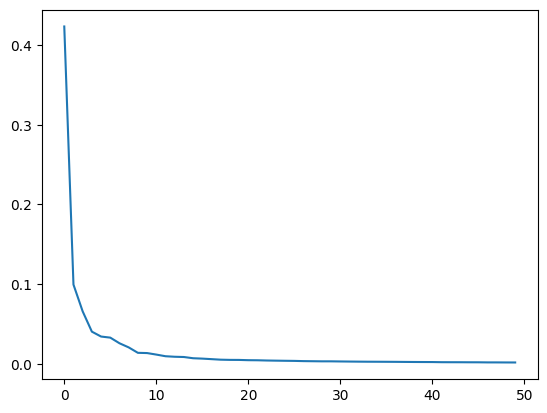

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(1.0, 0.04144167900085449)

In [15]:
scores = cross_validate(lr, fruits_2d, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(0.9966666666666667, 2.396397352218628)

In [16]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
pca.n_components_

2

In [19]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [20]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(0.9933333333333334, 0.027206802368164064)

In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

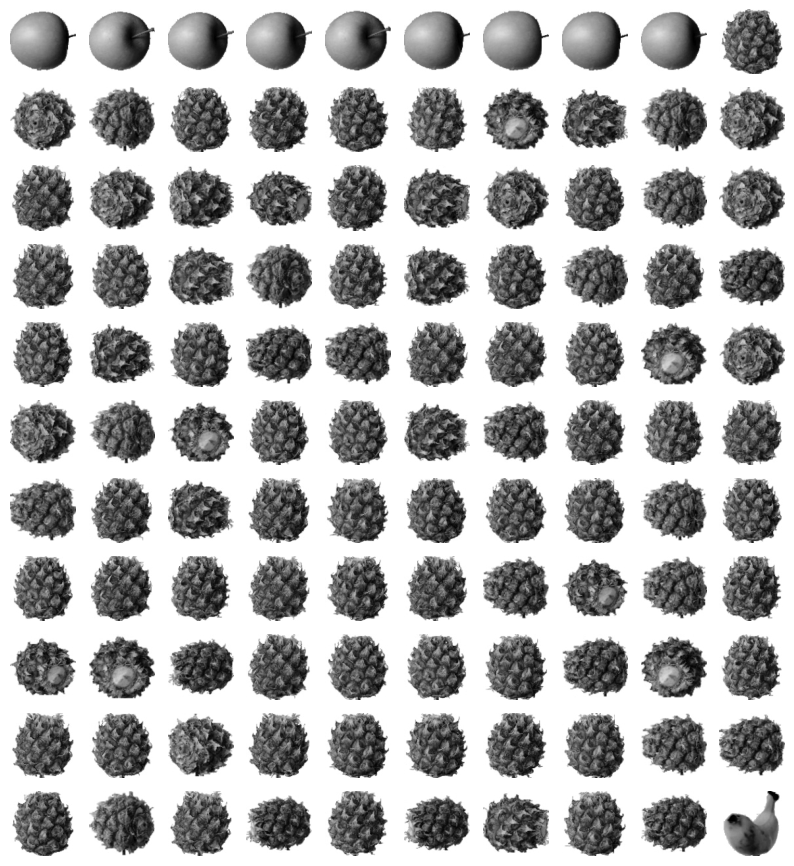

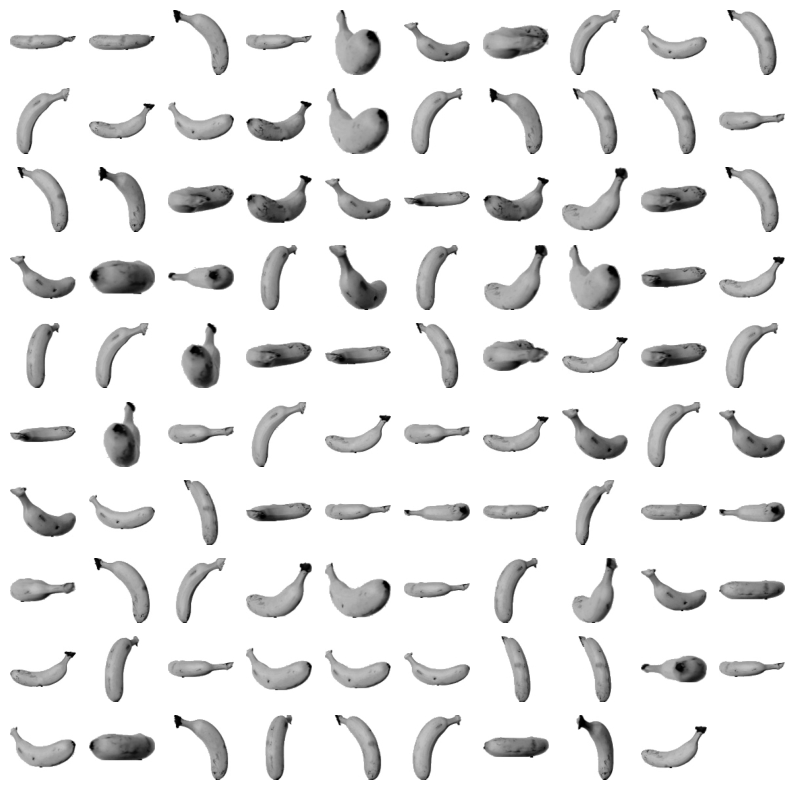

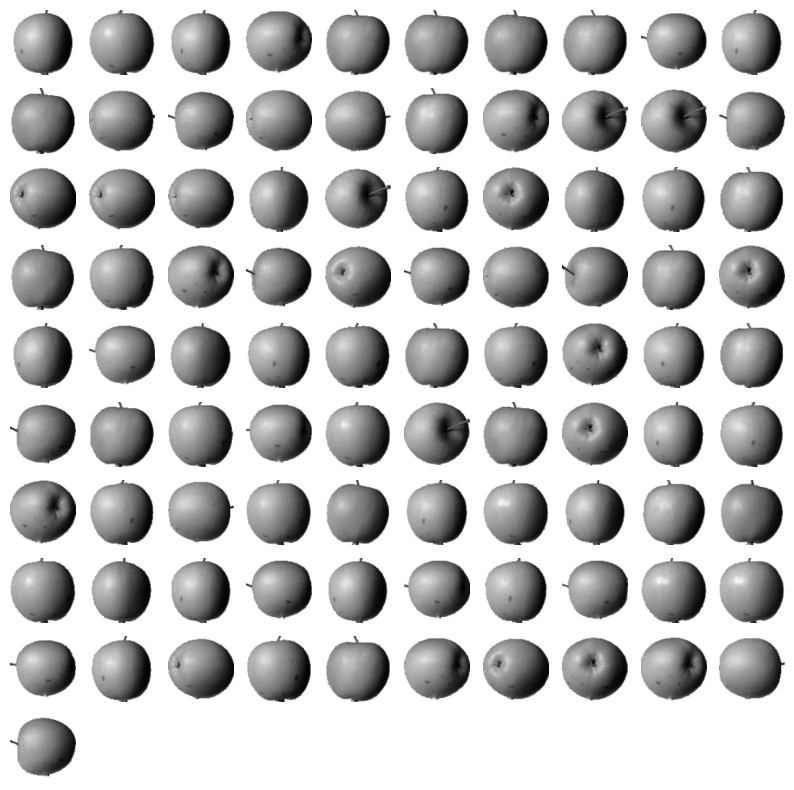

In [24]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

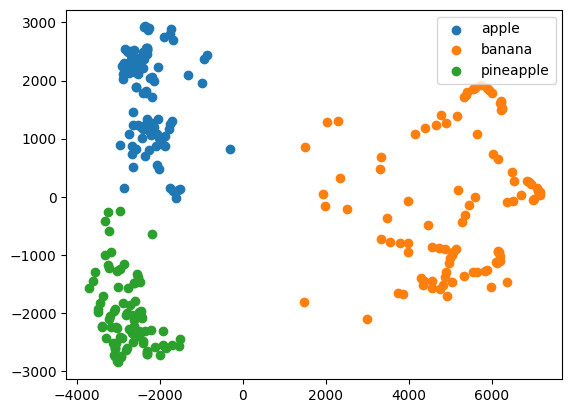

In [25]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()